### Exercise: Pandas 2

- Data preprocessing and Data cleansing

In this exercise, we will work with the file `wo_men.csv`.

It contains information about the height and shoe size of men and women. 

We want to preprocess and clean the data.

In [1]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

### Task 1

Read in the data from the csv-file `wo_men.csv` and save it in a Pandas Dataframe called `shoesize_heigth`.

In [2]:
### your solution ###
shoesize_height = pd.read_csv("wo_men.csv")

### Task 2

Write a function called `convert_sex(x)` which takes one argument:

- `x`: a string that represents the gender (`woman` or `man`)

It returns:

- `1` if the gender is `woman`.
- `0` if the gender is `man`.
- `None` in every other case.

In [3]:
### your solution ###
def convert_sex(x):
    if x=="woman":
        return 1
    elif x=="man":
        return 0
    else: # in case no data is available
        return None

In [4]:
### TESTING ###
assert(callable(convert_sex))
assert(convert_sex('woman') == 1)
assert(convert_sex('man') == 0)
assert(convert_sex('non-binary') == None)

### Task 3

In the pd dataframe `shoesize_height`, create a new column `gender2`. 

It contains the converted information about the gender (`1` for `woman`, `0` for `man`, else `None`).

*Hint: Use the `.apply` method to call your function `convert_sex`*

In [5]:
### your solution ###

shoesize_height['gender2'] = shoesize_height['gender'].apply(convert_sex)

### Task 4

Delete time column `time` in the `shoesize_height` dataframe.

In [6]:
### your solution ###
shoesize_height = shoesize_height.drop("time",axis=1)

### Task 5

Delete the *gender2* column in the `shoesize_height` dataframe.

In [7]:
### your solution ###
shoesize_height = shoesize_height.drop("gender2", axis=1)

### Task 6

Overwrite the string values in the column `gender` with binary values from your function `convert_sex`.

In [8]:
### your solution ###
shoesize_height['gender'] = shoesize_height['gender'].apply(convert_sex)

### Task 7

Find out if there are missing data values in the column `gender` and where they are. 

For this, you can use the methods 

                                data_frame.isna() 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html

*Hint: you can use masks here and check for each column*

In [9]:
### your solution ###
shoesize_height[shoesize_height['gender'].isna()]

,gender,height,shoe_size
85,NaN,NaN,NaN


### Task 8

Delete the missing data values with the method

                                    data_frame.dropna()
    
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [10]:
### your solution ###
shoesize_height = shoesize_height.dropna()

### Task 9

How many women and how many men are in the data set?

Create two new Pandas Dataframes, `woman` and `men` which contain only the information about the specific gender.

*Hint: you can use masks here*

In [11]:
### your solution ###
woman = shoesize_height[shoesize_height['gender'] == 1]

man = shoesize_height[shoesize_height['gender'] == 0]

### Task 10

What is the maximum and the minimum height and shoe_size per gender?

In [12]:
### your solution ###
print(woman.describe())
print()
print(man.describe())

       gender      height  shoe_size
count    82.0   82.000000  82.000000
mean      1.0  161.309512  38.871951
std       0.0   42.782380   5.651292
min       1.0    1.630000  35.000000
25%       1.0  161.250000  37.000000
50%       1.0  168.000000  38.000000
75%       1.0  171.000000  39.000000
max       1.0  364.000000  88.000000

       gender      height  shoe_size
count    18.0   18.000000  18.000000
mean      0.0  183.111111  43.888889
std       0.0    9.958082   2.398256
min       0.0  171.000000  41.000000
25%       0.0  175.750000  42.000000
50%       0.0  181.500000  44.000000
75%       0.0  184.500000  44.000000
max       0.0  206.000000  50.000000


### Task 11

Now we want to visualize the data in order to further evaluate. 

Make a 2d scatter plot with matplotlib plotting the height on the x-axis and the shoe size on the y-axis.

Give each gender a different color and a label. 

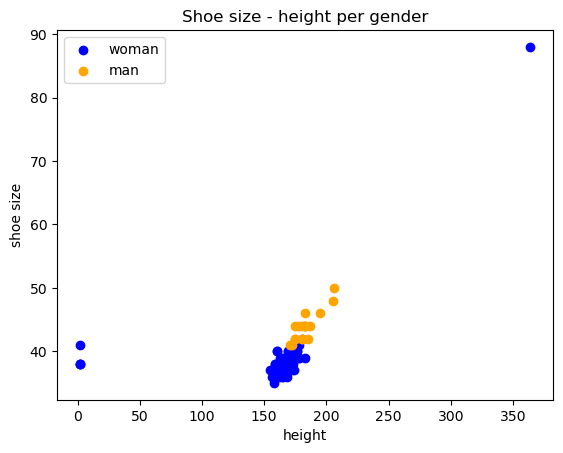

In [13]:
### your solution ###
plt.scatter(woman['height'], woman['shoe_size'], c = "blue", label="woman")
plt.scatter(man['height'], man['shoe_size'], c = "orange", label="man")

## this is here to help you
plt.title("Shoe size - height per gender")
plt.legend()
plt.xlabel("height")
plt.ylabel("shoe size")
plt.show()

### Task 12

Delete the data point with a height above 300.

In [14]:
### your solution ###
shoesize_height = shoesize_height[shoesize_height['height']<300]

### Task 13

Analyse the height values which are below 50. What is wrong here? Do a reasonable correction of the data.

In [15]:
### your solution ###
row_indexer = shoesize_height['height']<50
col_indexer = ['height']

# height like 1.63 to be tranformed to 163
shoesize_height.loc[row_indexer, col_indexer] *= 100

### Task 14

Now do the same visualisation as in Task 11.

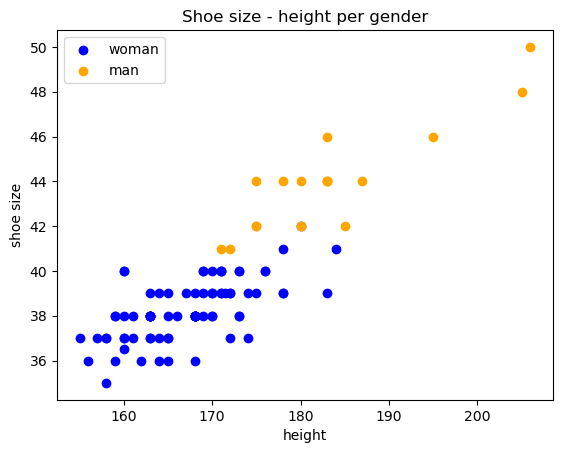

In [16]:
### your solution ###
woman = shoesize_height[shoesize_height['gender'] == 1]
man = shoesize_height[shoesize_height['gender'] == 0]

plt.scatter(woman['height'], woman['shoe_size'], c = "blue", label="woman")
plt.scatter(man['height'], man['shoe_size'], c = "orange", label="man")

plt.title("Shoe size - height per gender")
plt.legend()
plt.xlabel("height")
plt.ylabel("shoe size")
plt.show()